# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [126]:
%pip install --upgrade plotly

### Import Statements

In [127]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from fractions import Fraction
import plotly.graph_objects as go


### Notebook Presentation

In [128]:
pd.options.display.float_format = '{:,.2f}'.format

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read the Data

In [130]:
df_data = pd.read_csv('drive/MyDrive/nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [131]:
df_data.shape

(962, 16)

In [132]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [133]:
df_data.describe()

,year
count,962.00
mean,"1,971.82"
std,33.81
min,"1,901.00"
25%,"1,948.00"
50%,"1,977.00"
75%,"2,001.00"
max,"2,020.00"


In [134]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [135]:
df_data.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [136]:
df_data.duplicated().any()

False

### Check for NaN Values

In [137]:
df_data.isna().any()

year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [138]:
nan_counts = df_data.isna().sum()
print(nan_counts)

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [139]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])

#### Add a Column with the Prize Share as a Percentage

In [140]:
df_data['prize_share'] = df_data['prize_share'].apply(lambda x: float(Fraction(x)) * 100)

In [141]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",100.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",100.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",100.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,50.00,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,50.00,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [142]:
gender_counts = df_data['sex'].value_counts()
total_prizes = len(df_data)
men = (gender_counts['Male'] / total_prizes) * 100
women = (gender_counts['Female'] / total_prizes) * 100
data = {'Gender': ['Male', 'Female'],
        'Percentage': [men, women]}
df_gender = pd.DataFrame(data)


In [143]:
fig = px.pie(df_gender, values='Percentage', names='Gender', hole=0.6)
fig.update_traces(textinfo='percent+label')
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [144]:
df_data[df_data['sex'] == 'Female'].head(3)


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",25.00,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL
29,1905,Peace,The Nobel Peace Prize 1905,NaN,100.00,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",100.00,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [145]:
df_data['full_name'].value_counts().loc[lambda x: x > 1]


Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Marie Curie, née Sklodowska                                                          2
Name: full_name, dtype: int64

# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [146]:
p_b_c = df_data['category'].value_counts()
df_data['category'].value_counts()

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [147]:
num_categories = len(p_b_c)
fig = px.bar(p_b_c, x=p_b_c.index, y=p_b_c.values, color=p_b_c.index, color_continuous_scale='aggrnyl', labels={'x': 'Category', 'y': 'Number of Prizes'}, title='Number of Prizes Awarded by Category')
fig.update_layout(showlegend=False)
fig.show()

In [148]:

# Find the category with the most number of prizes
category_most_prizes = p_b_c.idxmax()
num_prizes_most = p_b_c.max()

# Find the category with the fewest number of prizes
category_fewest_prizes = p_b_c.idxmin()
num_prizes_fewest = p_b_c.min()

# Print the results
print("Number of categories: ", num_categories)
print("Category with the most prizes: ", category_most_prizes, " (", num_prizes_most, " prizes)")
print("Category with the fewest prizes: ", category_fewest_prizes, " (", num_prizes_fewest, " prizes)")


Number of categories:  6
Category with the most prizes:  Medicine  ( 222  prizes)
Category with the fewest prizes:  Economics  ( 86  prizes)


**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [149]:
economics_data = df_data[df_data['category'] == 'Economics']
economics_data_sorted = economics_data.sort_values('year')
economics_data_sorted.iloc[0]

year                                                                  1969
category                                                         Economics
prize                    The Sveriges Riksbank Prize in Economic Scienc...
motivation               "for having developed and applied dynamic mode...
prize_share                                                          50.00
laureate_type                                                   Individual
full_name                                                    Jan Tinbergen
birth_date                                             1903-04-12 00:00:00
birth_city                                                       the Hague
birth_country                                                  Netherlands
birth_country_current                                          Netherlands
sex                                                                   Male
organization_name                      The Netherlands School of Economics
organization_city        

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [150]:
# Group the data by category and sex, and count the occurrences
gender_split = df_data.groupby(['category', 'sex']).size().reset_index(name='count')

# Create the bar chart using Plotly Express
fig = px.bar(gender_split, x='category', y='count', color='sex', barmode='group')

# Customize the chart layout
fig.update_layout(
    title='Split Between Men and Women by Category',
    xaxis_title='Category',
    yaxis_title='Count',
    legend_title='Sex'
)

# Show the chart
fig.show()


# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [151]:
prizes_by_year = df_data.groupby('year').size()

In [152]:
rolling_avg = prizes_by_year.rolling(window=5).mean()

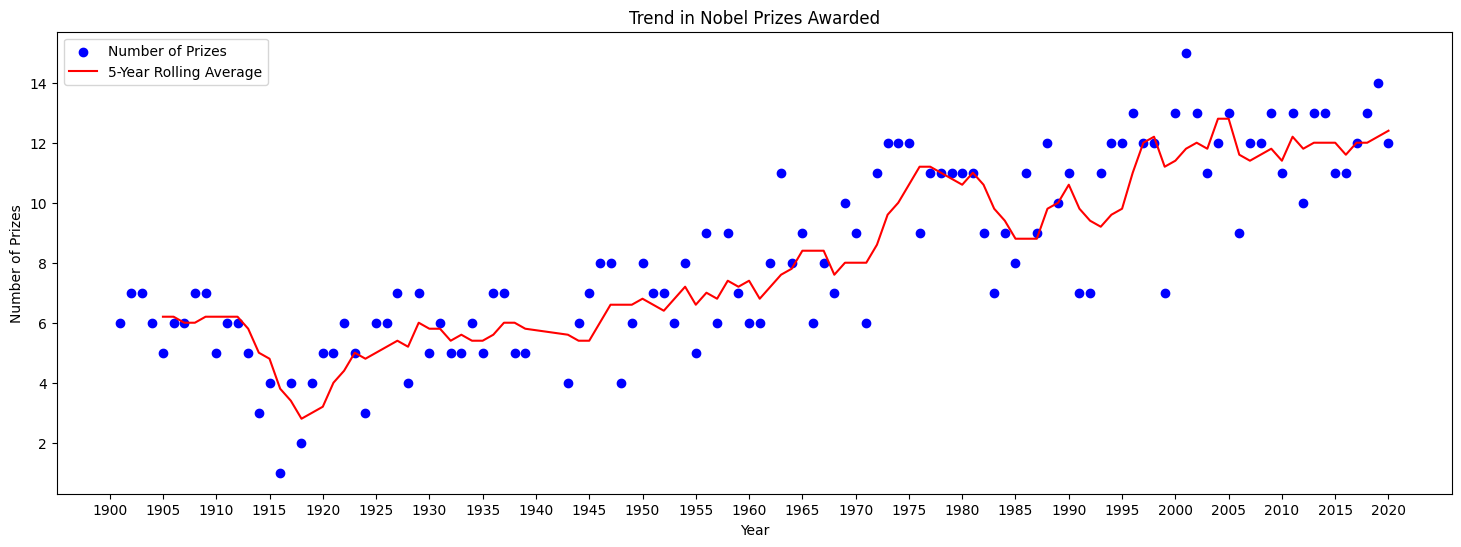

In [153]:
plt.figure(figsize=(18, 6))
plt.scatter(prizes_by_year.index, prizes_by_year.values, color='blue', label='Number of Prizes')
plt.plot(rolling_avg.index, rolling_avg.values, color='red', label='5-Year Rolling Average')
plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Trend in Nobel Prizes Awarded')
plt.legend()
plt.xticks(np.arange(1900, 2021, 5))  # Set x-axis tick marks every 5 years from 1900 to 2020
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [154]:
average_share = df_data.groupby('year')['prize_share'].mean()

In [155]:
rolling_average_share = average_share.rolling(window=5).mean()
years = df_data['year'].unique()
num_prizes = df_data.groupby('year').size()

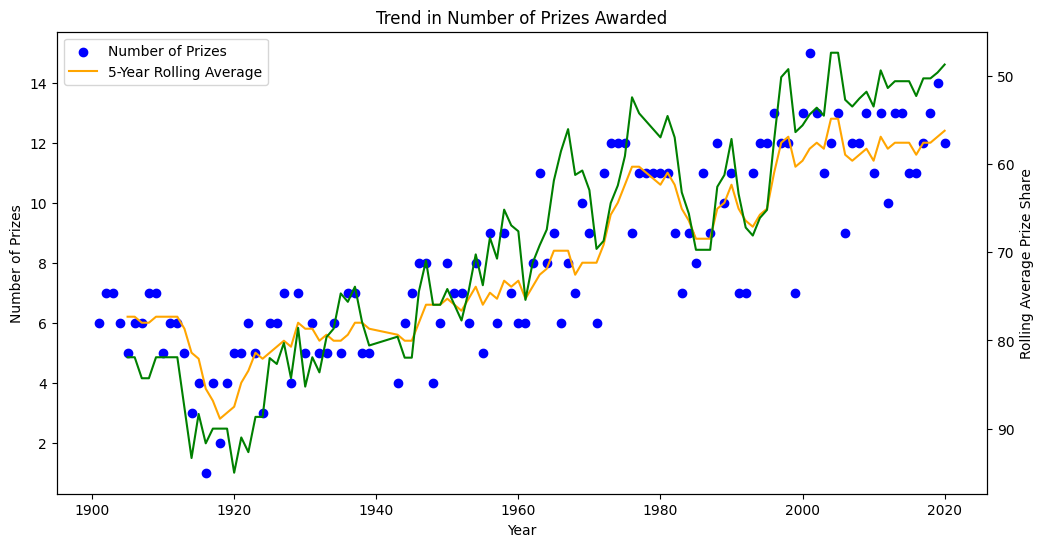

In [156]:
plt.figure(figsize=(12, 6))

# Scatter plot for number of prizes
plt.scatter(years, num_prizes, color='blue', label='Number of Prizes')
plt.plot(years, rolling_avg, color='orange', label='5-Year Rolling Average')
plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Trend in Number of Prizes Awarded')
plt.legend()

# Create secondary axis for rolling average prize share
ax2 = plt.gca().twinx()
ax2.plot(years, rolling_average_share, color='green', label='Rolling Average Prize Share')
ax2.set_ylabel('Rolling Average Prize Share')

# Invert secondary y-axis
ax2.invert_yaxis()

plt.show()


# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [157]:
top20_countries = df_data.groupby('birth_country_current').size().reset_index(name='Prizes')
top20_countries = top20_countries.sort_values('Prizes', ascending=False).head(20)
top20_countries

,birth_country_current,Prizes
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
40,Japan,27
57,Poland,27
61,Russia,26
11,Canada,20
68,Switzerland,19


In [158]:
import plotly.express as px

fig = px.bar(top20_countries, x='Prizes', y='birth_country_current', orientation='h', color='birth_country_current',
             title='Top 20 Countries with Most Nobel Prizes')
fig.update_layout(xaxis_title='Number of Prizes', yaxis_title='Country')

fig.show()


# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [159]:
import plotly.express as px

fig = px.choropleth(top20_countries,
                    locations='birth_country_current',
                    locationmode='country names',
                    color='Prizes',
                    hover_name='birth_country_current',
                    title='Top 20 Countries with Most Nobel Prizes',
                    color_continuous_scale="Rainbow")

fig.update_layout(geo=dict(showframe=False,
                           showcoastlines=False,
                           projection_type='natural earth'))

fig.show()


# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [160]:
country_category_counts = df_data.groupby(['birth_country_current', 'category']).size().reset_index(name='category_prizes')

In [161]:
country_total_prizes = country_category_counts.groupby('birth_country_current')['category_prizes'].sum().reset_index(name='total_prizes')

In [162]:

top20_countries = pd.merge(top20_countries, country_category_counts, on='birth_country_current', how='left')
top20_countries = pd.merge(top20_countries, country_total_prizes, on='birth_country_current', how='left')

In [163]:
fig = px.bar(top20_countries, y='birth_country_current', x='category_prizes', color='category',
             color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(title='Top 20 Countries with Nobel Prizes by Category',
                  xaxis_title='Total Prizes',
                  yaxis_title='Country',
                  legend_title='Category')

fig.show()


### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [164]:
df_data['cumulative_prizes'] = df_data.groupby('birth_country_current').cumcount() + 1

In [165]:
fig = px.line(df_data, x='year', y='cumulative_prizes', color='birth_country_current')

fig.update_layout(
    title="Cumulative Number of Prizes by Country",
    xaxis_title="Year",
    yaxis_title="Cumulative Prizes",
    legend_title="Country"
)

fig.show()


# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [166]:
organization_prizes = df_data.groupby('organization_name').size().reset_index(name='prize_count')

In [167]:
organization_prizes = organization_prizes.sort_values('prize_count', ascending=False)
organization_prizes.shape
organization_prizes

,organization_name,prize_count
196,University of California,40
68,Harvard University,29
167,Stanford University,23
117,Massachusetts Institute of Technology (MIT),21
198,University of Chicago,20
...,...,...
110,Long Term Capital Management,1
112,Madrid University,1
113,Mainz University,1
114,Marburg University,1


In [168]:
fig = px.bar(organization_prizes, x='prize_count', y='organization_name', orientation='h')

In [169]:
fig.update_layout(
    title="Number of Prizes by Organization",
    xaxis_title="Prize Count",
    yaxis_title="Organization",
    showlegend=False,
    height=3000
)
fig.show()

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [170]:
organization_cities = df_data.groupby('organization_city').size().reset_index(name='prize_count')
organization_cities = organization_cities.sort_values('prize_count', ascending=False)
top_20_cities = organization_cities.head(20)

In [171]:
fig = px.bar(top_20_cities, x='prize_count', y='organization_city', orientation='h')
fig.update_layout(
    title="Top 20 Organization Cities by Prize Count",
    xaxis_title="Prize Count",
    yaxis_title="Organization City",
    showlegend=False
)
fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [172]:
birth_cities = df_data.groupby('birth_city').size().reset_index(name='prize_count')
birth_cities = birth_cities.sort_values('prize_count', ascending=False)
top_20_birth_cities = birth_cities.head(20)
top_20_birth_cities

,birth_city,prize_count
382,"New York, NY",53
418,Paris,26
313,London,19
572,Vienna,14
112,"Chicago, IL",12
48,Berlin,11
590,"Washington, DC",8
76,"Brooklyn, NY",8
80,Budapest,8
64,"Boston, MA",8


In [174]:
fig = px.bar(top_20_birth_cities, x='prize_count', y='birth_city', orientation='h')

# Customize the chart layout
fig.update_layout(
    title="Top 20 Birth Cities by Prize Count",
    xaxis_title="Prize Count",
    yaxis_title="Birth City",
    yaxis=dict(autorange="reversed"),
    height=600,
)

# Show the chart
fig.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [175]:
grouped_data = df_data.groupby(['organization_name', 'organization_city', 'organization_country']).size().reset_index(name='prizes')

# Rename the columns
grouped_data = grouped_data.rename(columns={
    'organization_name': 'Organization',
    'organization_city': 'Organization City',
    'organization_country': 'Country'
})

# Display the resulting DataFrame
grouped_data.head()

,Organization,Organization City,Country,prizes
0,A.F. Ioffe Physico-Technical Institute,St. Petersburg,Russia,1
1,Aarhus University,Aarhus,Denmark,1
2,Academy of Sciences,Moscow,Russia,3
3,Amsterdam University,Amsterdam,Netherlands,2
4,Argonne National Laboratory,"Argonne, IL",United States of America,1


In [177]:

fig = px.sunburst(
    data_frame=grouped_data,
    path=['Country', 'Organization City', 'Organization'],
    values='prizes'
)

fig.show()
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,cumulative_prizes
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",100.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",100.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",100.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,50.00,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,2.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,50.00,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,33.33,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,104.00
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",100.00,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,25.00,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,281.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,25.00,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,84.00


# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [182]:
# Convert 'birth_date' column to datetime format
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])

# Extract the year from 'year' column
df_data['year'] = pd.to_datetime(df_data['year'], format='%Y')

# Calculate the age at the time of winning and assign it to 'winning_age' column
df_data['winning_age'] = df_data['year'].dt.year - df_data['birth_date'].dt.year


In [180]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,cumulative_prizes,winning_age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",100.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",100.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62.00
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",100.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47.00
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,50.00,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,2.00,79.00
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,50.00,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,1.00,73.00


### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [115]:
df_data.loc[df_data['winning_age'].idxmax()]

year                                                2019-01-01 00:00:00
category                                                      Chemistry
prize                                 The Nobel Prize in Chemistry 2019
motivation               “for the development of lithium-ion batteries”
prize_share                                                       33.33
laureate_type                                                Individual
full_name                                               John Goodenough
birth_date                                          1922-07-25 00:00:00
birth_city                                                         Jena
birth_country                                                   Germany
birth_country_current                                           Germany
sex                                                                Male
organization_name                                   University of Texas
organization_city                                             Au

In [116]:
df_data.loc[df_data['winning_age'].idxmin()]

year                                                   2014-01-01 00:00:00
category                                                             Peace
prize                                           The Nobel Peace Prize 2014
motivation               "for their struggle against the suppression of...
prize_share                                                          50.00
laureate_type                                                   Individual
full_name                                                 Malala Yousafzai
birth_date                                             1997-07-12 00:00:00
birth_city                                                         Mingora
birth_country                                                     Pakistan
birth_country_current                                             Pakistan
sex                                                                 Female
organization_name                                                      NaN
organization_city        

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [117]:
age_stats = df_data['winning_age'].describe()
age_stats


count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

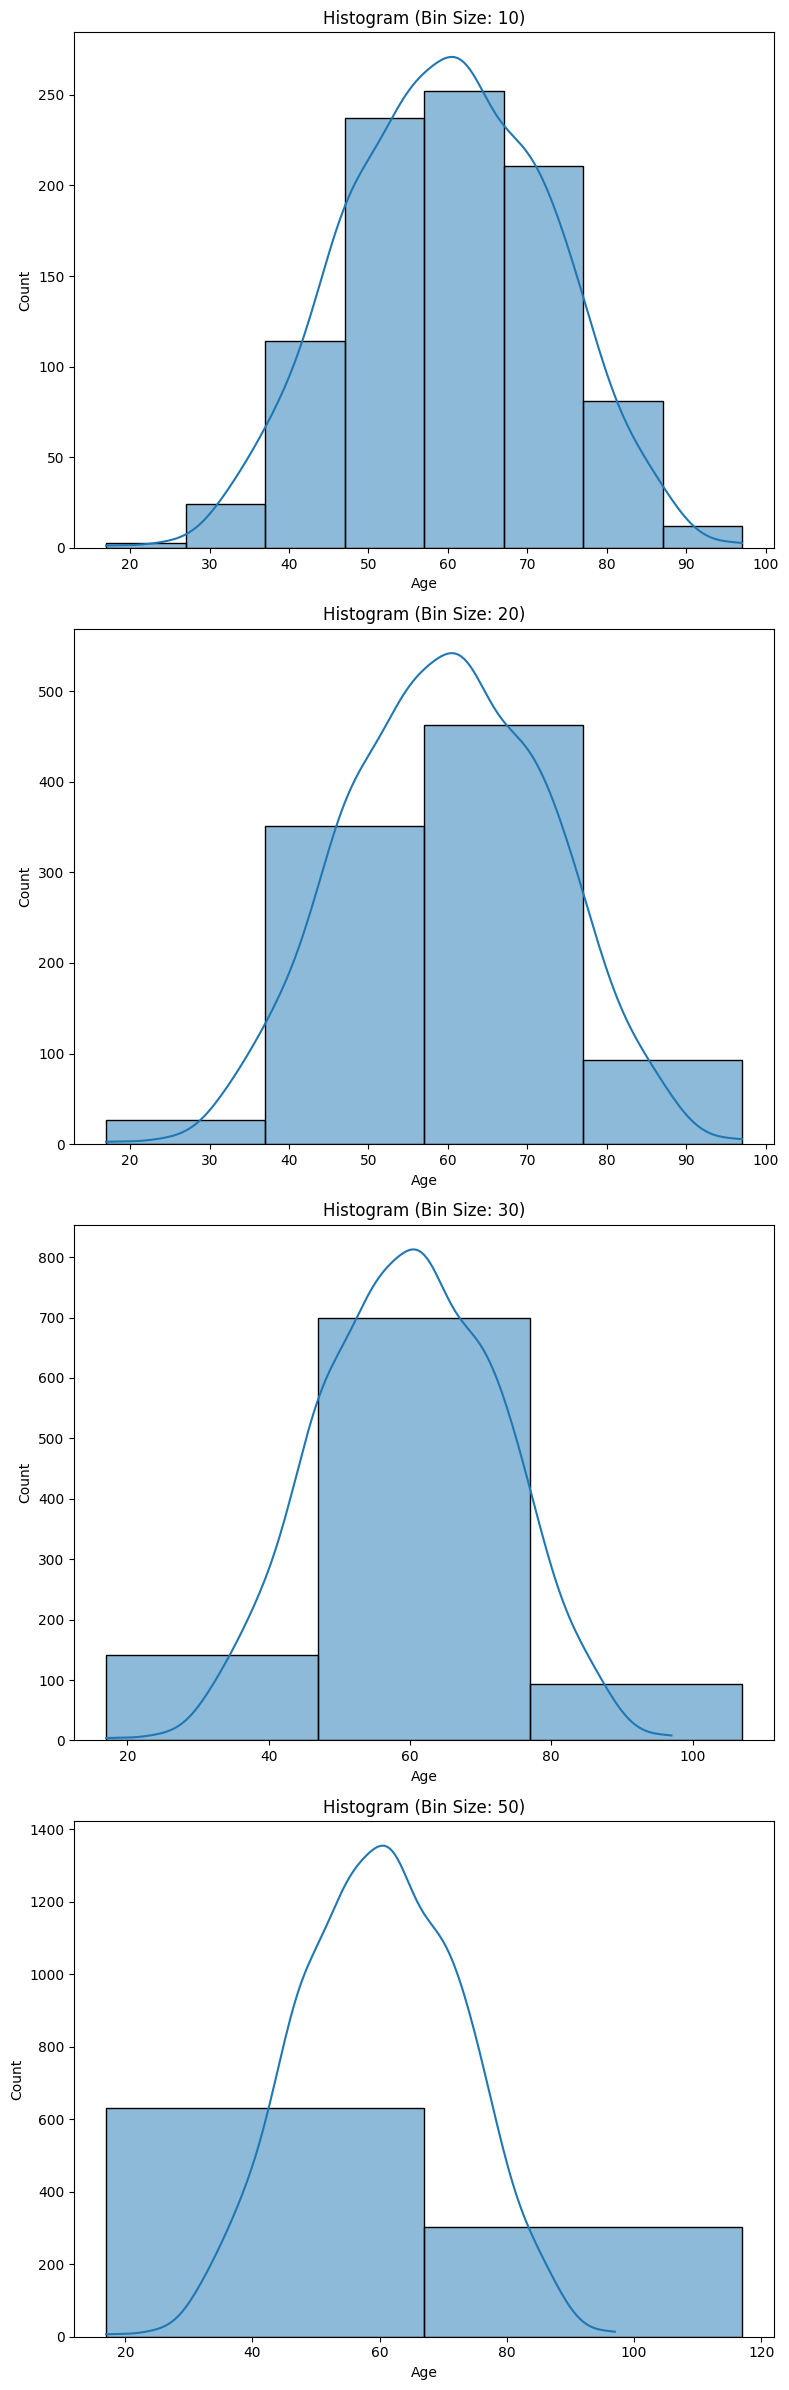

In [118]:
bin_sizes = [10, 20, 30, 50]

# Create subplots for each bin size
fig, axes = plt.subplots(len(bin_sizes), 1, figsize=(8, 6 * len(bin_sizes)))

# Plot histograms for each bin size
for i, bin_size in enumerate(bin_sizes):
    ax = axes[i]
    sns.histplot(data=df_data, x='winning_age', binwidth=bin_size, kde=True, ax=ax)
    ax.set_title(f'Histogram (Bin Size: {bin_size})')
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


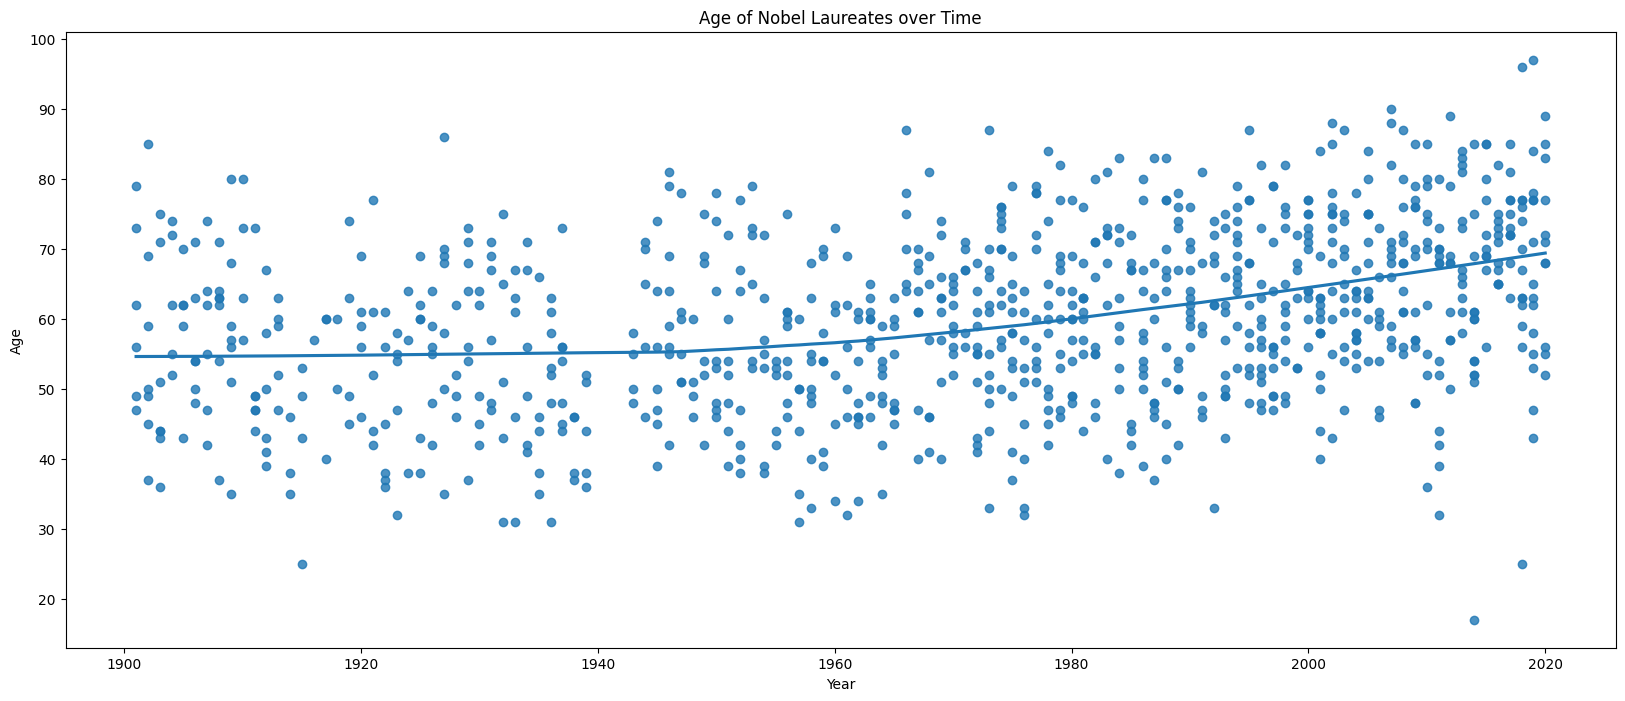

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,cumulative_prizes,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",100.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",100.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",100.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,50.00,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,2.00,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,50.00,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,1.00,73.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,33.33,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,104.00,71.00
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",100.00,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,25.00,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,281.00,55.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,25.00,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,84.00,68.00


In [183]:
# Convert 'year' column to numeric
df_data['year'] = df_data['year'].dt.strftime('%Y')
df_data['year'] = pd.to_numeric(df_data['year'], errors='coerce')

plt.figure(figsize=(20,8))
# Create the regplot
sns.regplot(data=df_data, x='year', y='winning_age', lowess=True)

# Set the plot title and axis labels
plt.title('Age of Nobel Laureates over Time')
plt.xlabel('Year')
plt.ylabel('Age')

# Show the plot
plt.show()
df_data

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

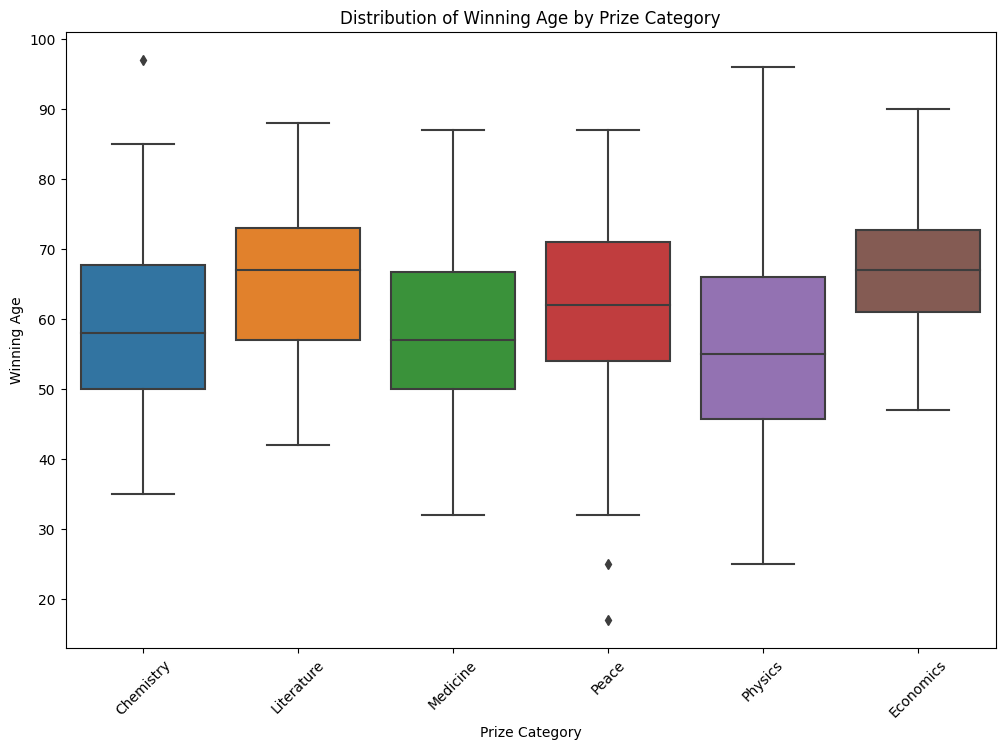

In [184]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_data, x='category', y='winning_age')
plt.xlabel('Prize Category')
plt.ylabel('Winning Age')
plt.title('Distribution of Winning Age by Prize Category')
plt.xticks(rotation=45)
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


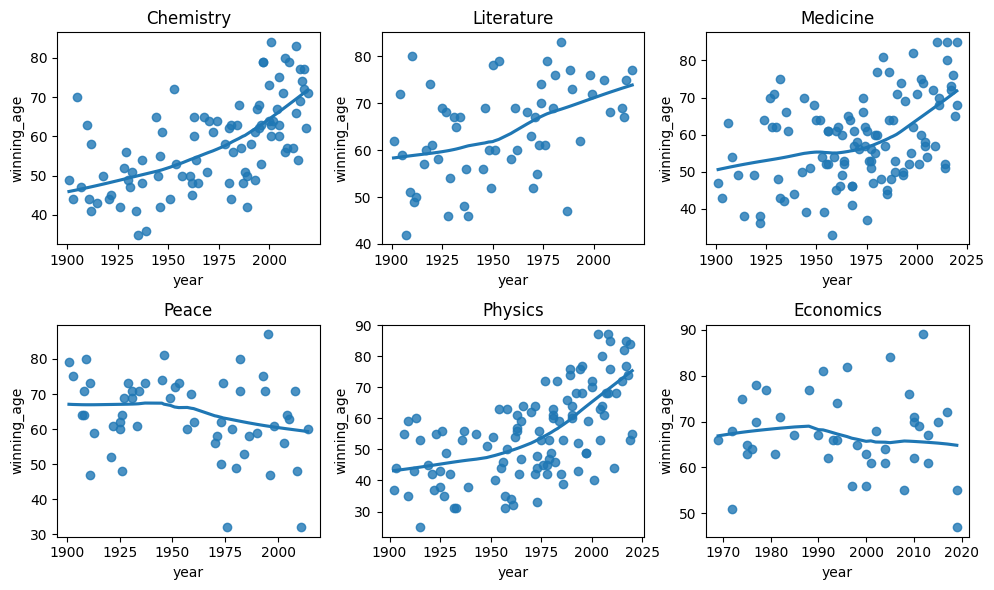

In [194]:
plt.figure(figsize=(10, 6))
categories = df_data['category'].unique()

for i, category in enumerate(categories):
    data_category = df_data[df_data['category'] == category]
    data_sample = data_category.sample(frac=0.5, random_state=42)  # Adjust the fraction as needed

    plt.subplot(2, 3, i+1)
    sns.regplot(data=data_sample, x='year', y='winning_age', lowess=True)
    plt.title(category)

plt.tight_layout()
plt.show()



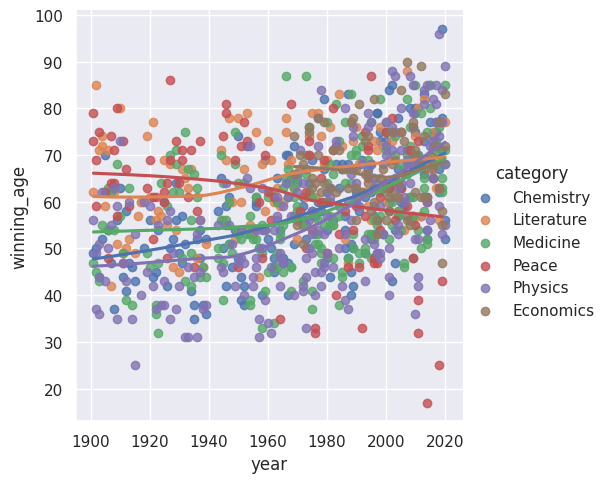

In [200]:
sns.set(font_scale=1.5)  # Increase the font size for better readability
sns.set(rc={'figure.figsize': (20, 12)})  # Set the figure size

sns.lmplot(data=df_data, x='year', y='winning_age', hue='category', lowess=True)
plt.show()
